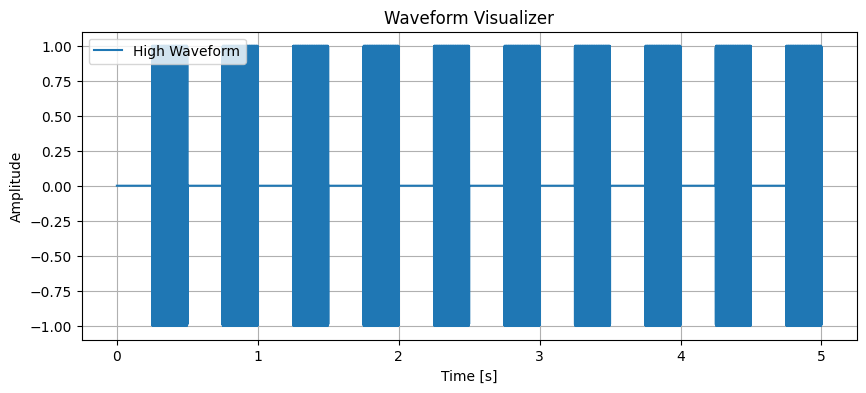

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def create_waveform_visualizer(audio_type, silence, silence_duration, waveform_duration):
    """
    Generates and visualizes a waveform based on the given parameters.
    
    Parameters:
    - audio_type (str): Type of audio waveform ('normal' or 'high')
    - silence (bool): If True, includes silence parts in the audio
    - silence_duration (float): Duration of silence in seconds
    - waveform_duration (float): Duration of the whole waveform in seconds
    """
    sample_rate = 16000  # Samples per second
    t = np.linspace(0, waveform_duration, int(
        sample_rate * waveform_duration), endpoint=False)

    if audio_type == 'normal':
        frequency = 440  # A4 note frequency in Hz
        amplitude = 0.5
    elif audio_type == 'high':
        frequency = 880  # A5 note frequency in Hz
        amplitude = 1.0
    else:
        raise ValueError("Invalid audio_type. Use 'normal' or 'high'.")

    waveform = amplitude * np.sin(2 * np.pi * frequency * t)

    if silence:
        silence_samples = int(silence_duration * sample_rate)
        total_samples = len(waveform)
        silence_periods = total_samples // silence_samples
        for i in range(silence_periods):
            start_index = i * silence_samples
            end_index = start_index + silence_samples // 2
            waveform[start_index:end_index] = 0

    plt.figure(figsize=(10, 4))
    plt.plot(t, waveform, label=f'{audio_type.capitalize()} Waveform')
    plt.title('Waveform Visualizer')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage:
create_waveform_visualizer('high', True, 0.5, 5)